# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting weather or not someone has heart disease based on their medical attributes.

Taking the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools 

Using pandas, Matplotlib and NumPy for data analysis and manipulation. 

In [4]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# sci-kit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

In [2]:
import sklearn
sklearn.__version__

'1.3.2'

## Load Data 

In [5]:
df =  pd.read_csv('heart-disease.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

## EDA (Exploratory Data Analysis)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

**EDA checklist**
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?



In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
# Let's find out how many of each target class do we have
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

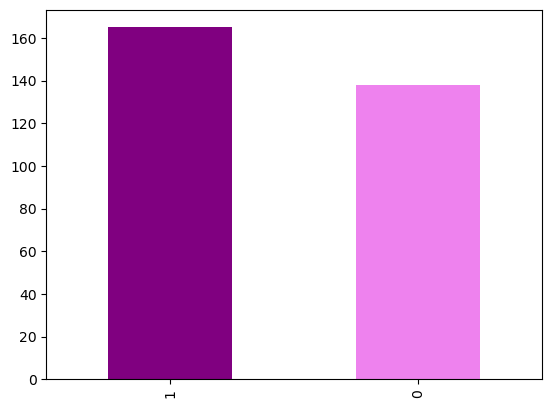

In [15]:
# Visualize the target 
df['target'].value_counts().plot(kind = 'bar', color = ['purple','violet'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
# Are there any missing values? -- In our case we already know that there are none looking at df.info
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex


In [19]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


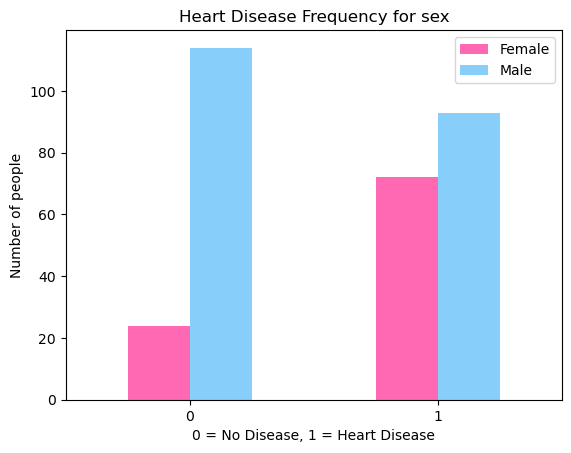

In [26]:
# Let's see this visaully 
pd.crosstab(df.target, df.sex).plot(kind = 'bar', color = ['hotpink','lightskyblue'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Heart Disease')
plt.ylabel('Number of people')
plt.legend(['Female','Male'])
plt.xticks(rotation = 0);

## Age VS Max heart rate (thalach) for Heart-Disease 

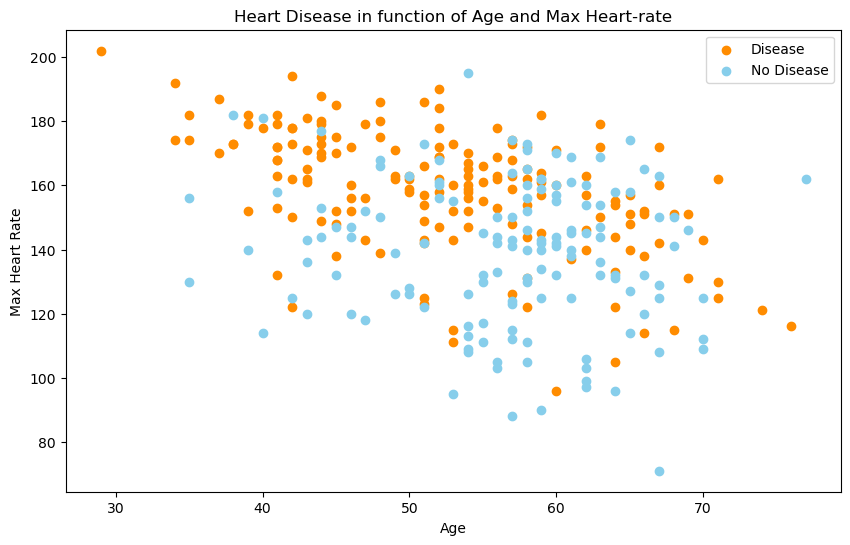

In [43]:
# Create another figure
plt.figure(figsize =(10,6))

#scatter with positive samples
plt.scatter(df['age'][df['target']==1],
           df['thalach'][df['target']==1],
           color = 'darkorange')

# scatter with negative samples
plt.scatter(df['age'][df['target']==0],
           df['thalach'][df['target']==0],
           color = 'skyblue')

# Adding info
plt.title('Heart Disease in function of Age and Max Heart-rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);


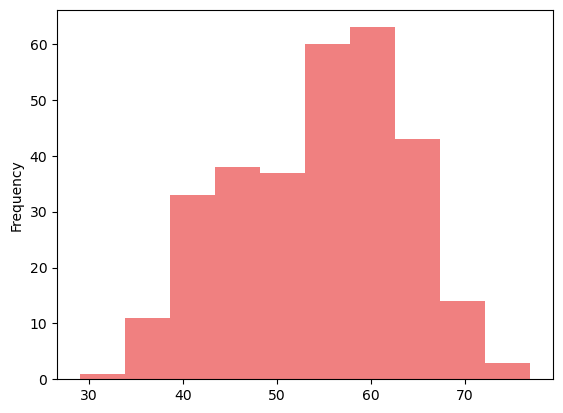

In [47]:
# Check the Distribution of age column with histogram
df.age.plot.hist(color = 'lightcoral');

### Heart Disease Frequency per Chest pain type

* cp - chest pain type
      0: Typical angina: chest pain related decrease blood supply to the heart
      1: Atypical angina: chest pain not related to heart
      2: Non-anginal pain: typically esophageal spasms (non heart related)
      3: Asymptomatic: chest pain not showing signs of disease

  

In [49]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


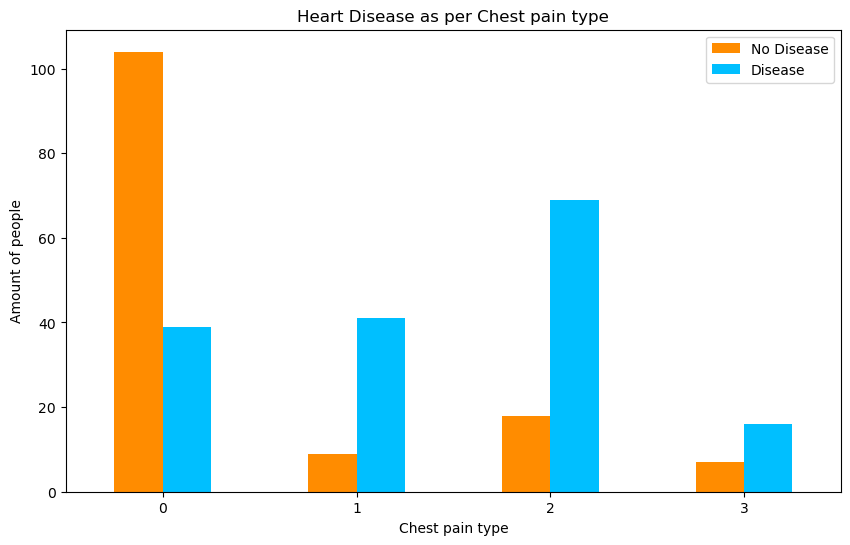

In [55]:
# Making the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind = 'bar',
                                 figsize = (10,6),
                                 color = ['darkorange','deepskyblue'])

# Communications
plt.title('Heart Disease as per Chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount of people')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation = 0);

In [56]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


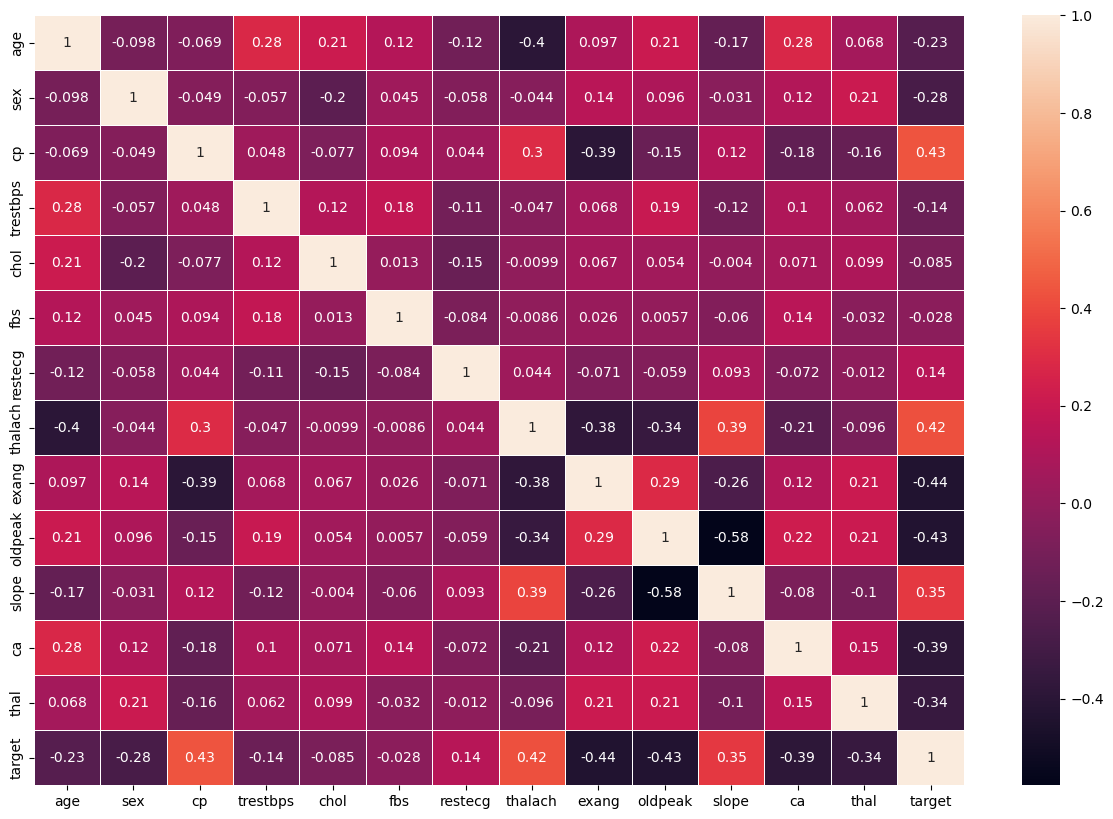

In [59]:
# Let's make it visual with heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot= True, linewidths=0.5)

## 5. Modelling


In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
# Splitting the data into X and Y
X = df.drop('target',axis =1)
y = df['target']

In [63]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [66]:
# Splitting the data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2) 

In [67]:
X_train.shape, y_train.shape

((242, 13), (242,))

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
  
    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier

    


In [70]:
# Let's put the models in a Dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Lets Create a function to fit and score the models
def fit_and_score(models,X_train, X_test, y_train, y_test):
    '''
    This function fits and evaluates machine learning models.
    models : a dict of different sklearn machine learning models.
    X_train: training data(without labels)
    X_test: testing data(without labels)
    y_train : training labels
    y_test : test labels
    '''
    # random seed
    np.random.seed(42)
    
    # make a dictionary for the model scores
    model_scores = {}
    
    # Loop through all the models and fit them
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # evaluate the models
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [73]:
model_score = fit_and_score(models,X_train, X_test, y_train, y_test)
model_score

C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

In [75]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])

In [76]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


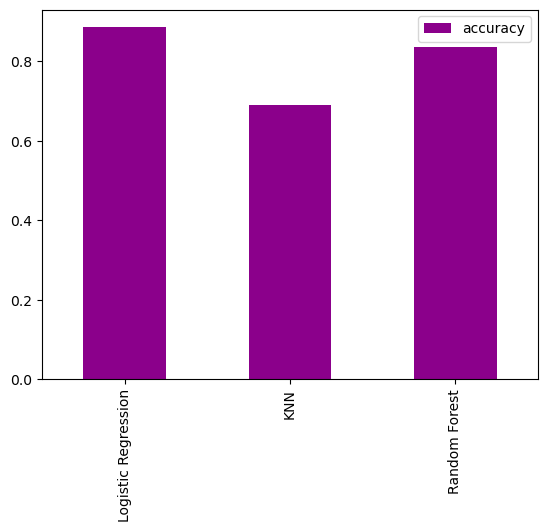

In [92]:
model_compare.T.plot(kind = 'bar', color = ['darkmagenta']);

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


## Hyperparameter tuning (by hand)

In [95]:
# Let's try tuning KNeighbours classifier

train_score = []
test_score = []

# Create a list of values for n_neighbours
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# lets loops through the neighbours
for n in neighbors:
    knn.set_params(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test, y_test))


In [96]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [97]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum Test score on KNN is : 75.41%


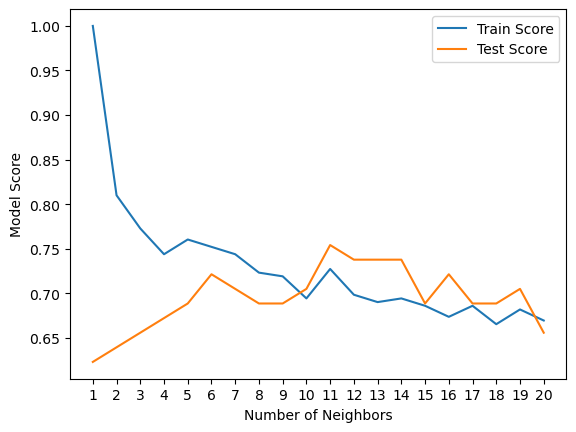

In [107]:
plt.plot(neighbors, train_score, label = 'Train Score')
plt.plot(neighbors, test_score, label = 'Test Score')
plt.xticks(neighbors) # we can also put something like np.arange(1,21,1)
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f"Maximum Test score on KNN is : {max(test_score)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

As we saw that KNN did not perform upto the mark even after Hyperparameter tuning, lets try tuning 

* LogisticRegression()
* RandomForestClassifier()

using RandomizedSearchCV

In [109]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'penalty': ['l1', 'l2', None],
                'C' : np.logspace(-4,4,20),
                'solver' : ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2,20,2),
           'min_samples_leaf' : np.arange(2,10,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [110]:
# Tune Logistic Regression
np.random.seed(42)

# Setup the hyper parameters using RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv = 5,
                                n_iter= 20,
                               verbose= 2)

# Fit Logistic Regression to these hyperparameters
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=None, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=None, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.2883789

C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.69019

C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\98for\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None wil

[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\98for\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.45042517        nan 0.81386054 0.81794218 0.70229592 0.81794218
 0.80977891 0.81794218 0.61556122 0.81794218 0.81794218        nan
 0.81811224 0.45042517 0.81794218        nan        nan 0.54957483
 0.81386054 0.66930272]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', None],
                                        'solver': ['liblinear']},
                   verbose=2)

In [111]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.623776739188721}

In [115]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [181]:
# setup random seed
np.random.seed(42)

# Setup random hyperparameter
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv =5,
                           n_iter= 20,
                           verbose =2)

# fit these hyperparameters
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=3, min_samples_leaf=8, min_samples_split=20, n_estimators=800; total time=   3.1s
[CV] END max_depth=3, min_samples_leaf=8, min_samples_split=20, n_estimators=800; total time=   2.8s
[CV] END max_depth=3, min_samples_leaf=8, min_samples_split=20, n_estimators=800; total time=   2.9s
[CV] END max_depth=3, min_samples_leaf=8, min_samples_split=20, n_estimators=800; total time=   3.0s
[CV] END max_depth=3, min_samples_leaf=8, min_samples_split=20, n_estimators=800; total time=   2.9s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=20, n_estimators=760; total time=   2.8s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=20, n_estimators=760; total time=   2.8s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=20, n_estimators=760; total time=   2.8s
[CV] END max_depth=3, min_samples_leaf=6, min_samples_split=20, n_estimators=760; total time=   2.8s
[CV] END max_depth=3, min_sam

[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=410; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=410; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=410; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=410; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   3.0s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   2.9s
[CV] END max_depth=3, min_samples_leaf=8, min_samples_split=20, n_estimators=760; total tim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [10, 20],
                                        'n_estimators': [760, 410, 800, 460,
                                                         900]},
                   verbose=2)

In [184]:
rs_rf.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_depth': 3}

In [185]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### Hyperparameter tuning using GridSearchCV

Let's try for both LogisticRegression and RandomForest. Here RandomForest seem to provide better results.

In [186]:
# Params for LogisticRegression
log_reg_gs  = {'C' : np.logspace(-4,4,30),
                'solver' : ['liblinear']}

# Params for Random Forest
rf_gs = rf_grid = {'n_estimators': [760,410,800,460,900],
           'max_depth' : [3],
           'min_samples_split' : [10,20],
           'min_samples_leaf' : [4,6,8]}

In [187]:
# Setup GridSearchCV for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_gs,
                          cv = 5,
                          verbose= 2,
                          )

# Fit the model 
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [188]:
# Let's find out the best params 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [189]:
# Evaluating the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [143]:
# Setup GridSearchCV for Random Forest Classifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid= rf_gs,
                     cv = 5,
                     verbose = True)

# Fit data in the model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3], 'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [10, 20],
                         'n_estimators': [760, 410, 800, 460, 900]},
             verbose=True)

In [146]:
gs_rf.score(X_test, y_test)

0.8688524590163934

Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

Also, To make comparisons and evaluate our trained model, first we need to make predictions.

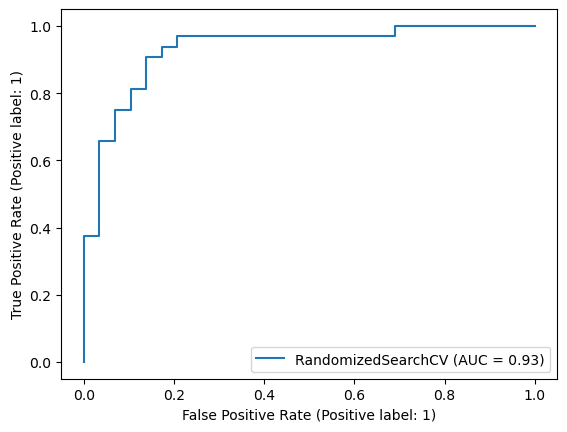

In [190]:
# Make predictions with the tuned model
y_pred = gs_log_reg.predict(X_test)

# plot Roc curve and calculate the AUC
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test);

In [191]:
# Confusion Metrics
conf = confusion_matrix(y_test, y_pred)

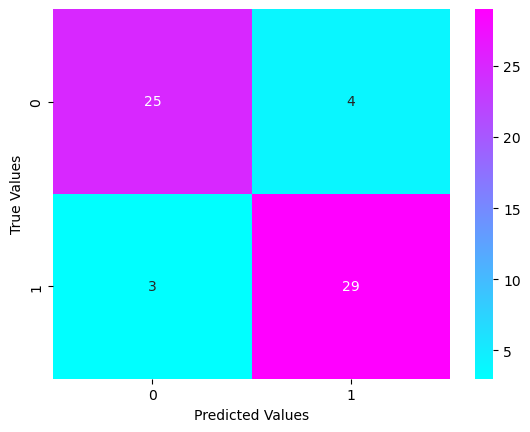

In [192]:
sns.heatmap(conf,
            annot= True,
            cmap = 'cool')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

In [193]:
# Let's get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation metric using Cross validation

Let's Calculate accuracy, Precision, recall and F1 using cross validation (cross_val_score)

In [194]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [195]:
# Create a new Classifier with the best Params
clf = LogisticRegression(C = 0.20433597178569418,
                         solver= 'liblinear')

In [206]:
# Cross-Validated Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         scoring= 'accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [207]:
# Cross- Validated Precision
cv_pre = cross_val_score(clf,
                         X,
                         y,
                         scoring= 'precision')
cv_pre = np.mean(cv_pre)
cv_pre

0.8207936507936507

In [208]:
# Cross- Validated Recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         scoring= 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [209]:
# Cross- Validated F1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         scoring= 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [217]:
# Let's visualize the validated metrics
cv_metrics = pd.DataFrame({'Accuracy' : cv_acc,
                          'Precision': cv_pre,
                          'Recall': cv_recall,
                          'F1-score': cv_f1},
                          index= ['Metrics'])

cv_metrics

,Accuracy,Precision,Recall,F1-score
Metrics,0.844699,0.820794,0.921212,0.867301


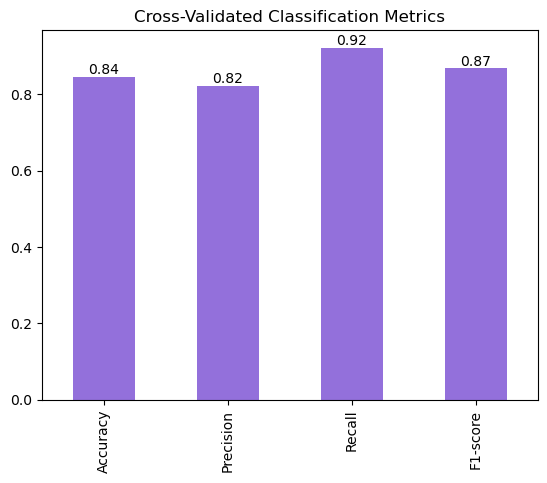

In [222]:
cv_metrics.T.plot.bar(color = 'mediumpurple',
                      legend = False,
                      title = 'Cross-Validated Classification Metrics')

# Add values on the bar
for idx, value in enumerate(cv_metrics.T.values.flatten()):
    plt.text(idx, value , str(round(value, 2)), ha='center', va='bottom')
    
plt.show()

### Feature Importance

"which features contributed most to the outcomes of the model and how did they contribute?"

In [225]:
# Finding feature importance for logistic Regression.

# Fit an instance for logistic Regression
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                         solver= 'liblinear')

In [226]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [227]:
# Fetch Coef values
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [228]:
# Match Coef values to the features
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [229]:
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

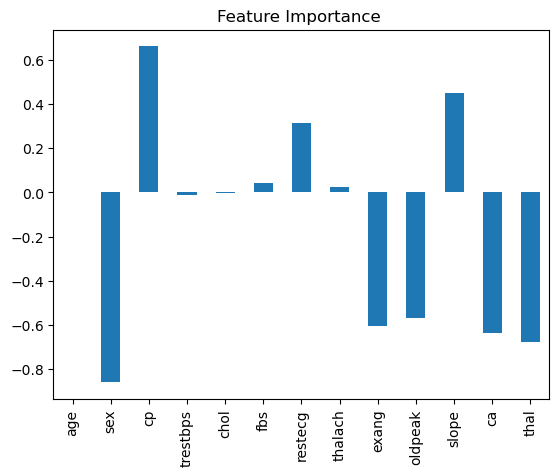

In [232]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = 'Feature Importance ',legend = False);

## 6. Experimentation

As we havent hit our evaluation metric yet, we can try following things:

* Could we get more data?
* Could we try to make our existing models better?
* Could we try a better model? Like Catboost or XGBoost?
* Once the model is good enough, we can export our models using Pickle or joblib